In [2]:
#Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
#Evalution
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings



<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X=df.drop('math_score',axis=1)

In [6]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [7]:
y=df.math_score

In [8]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading_score', 'writing_score'], dtype='object'))])

In [11]:
X=preprocessor.fit_transform(X)

In [12]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
X_train

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.8792638 ,  0.78653904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.81073728,  0.72069783],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.0801075 , -0.46444386],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.49126664, -0.99117351],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -1.45063795, -0.99117351],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.4960025 ,  1.37910989]])

In [15]:
y_train

541    79
440    67
482    68
422    47
778    72
       ..
106    87
270    69
860    53
435    50
102    85
Name: math_score, Length: 700, dtype: int64

In [16]:
X_train.shape

(700, 19)

In [25]:
models={
    'linear':LinearRegression(),
    "lasso":Lasso(),
    'ridge':Ridge(),
    'elasticnet':ElasticNet(),
    "Kneighbour":KNeighborsRegressor(),
    'svm':SVR(),
    'Xgboost':XGBRegressor(),
    'Catboost':CatBoostRegressor(),
    'GradienBooost':GradientBoostingRegressor(),
    'Adaboost':AdaBoostRegressor(),
    'Randomforest':RandomForestRegressor(),
    'Decisiontree':DecisionTreeRegressor()
    }
models

{'linear': LinearRegression(),
 'lasso': Lasso(),
 'ridge': Ridge(),
 'elasticnet': ElasticNet(),
 'Kneighbour': KNeighborsRegressor(),
 'svm': SVR(),
 'Xgboost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 'Catboost': <catboost.core.CatBoostRegressor at 0x7c6ce82f7700>,
 'GradienBooo

In [26]:
def evaluate_model(true_value,predicted_value):
    score=r2_score(true_value,predicted_value)
    mse=mean_squared_error(true_value,predicted_value)
    mae=mean_absolute_error(true_value,predicted_value)
    return score,mse,mae

In [24]:
X_train

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.8792638 ,  0.78653904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.81073728,  0.72069783],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.0801075 , -0.46444386],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.49126664, -0.99117351],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -1.45063795, -0.99117351],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.4960025 ,  1.37910989]])

In [28]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [36]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
models_list=[]
r2_scores=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    #Predictions
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    
    #Evalution
    mae_train,rmse_train,r2_train=evaluate_model(y_train,y_pred_train)
    mae_test,rmse_test,r2_test=evaluate_model(y_test,y_pred_test)
    
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    print("Model Performance in Training Dataset")
    print("-r2Score:{:.4f}".format(r2_train))
    print("-rmse:{:.4f}".format(rmse_train))
    print("-mae:{:.4f}".format(mae_train))
    
    print("-"*20)
    
    print("Model Performance on Test Data set")
    print("-r2Score:{:.4f}".format(r2_test))
    print("-rmse:{:.4f}".format(rmse_test))
    print("-mae:{:.4f}".format(mae_test))
    r2_scores.append(r2_test)
    print('='*30)
    print("\n")
    
    

    
    

Linear Regression
Model Performance in Training Dataset
-r2Score:0.8751
-rmse:5.2487
-mae:4.1987
--------------------
Model Performance on Test Data set
-r2Score:0.8758
-rmse:5.5595
-mae:4.4207


Lasso
Model Performance in Training Dataset
-r2Score:0.8078
-rmse:6.5106
-mae:5.1582
--------------------
Model Performance on Test Data set
-r2Score:0.8103
-rmse:6.8705
-mae:5.3929


Ridge
Model Performance in Training Dataset
-r2Score:0.8751
-rmse:5.2487
-mae:4.1977
--------------------
Model Performance on Test Data set
-r2Score:0.8759
-rmse:5.5566
-mae:4.4155


K-Neighbors Regressor
Model Performance in Training Dataset
-r2Score:0.8538
-rmse:5.6788
-mae:4.5063
--------------------
Model Performance on Test Data set
-r2Score:0.7725
-rmse:7.5231
-mae:5.8407


Decision Tree
Model Performance in Training Dataset
-r2Score:0.9996
-rmse:0.2988
-mae:0.0214
--------------------
Model Performance on Test Data set
-r2Score:0.7291
-rmse:8.2102
-mae:6.5933


Random Forest Regressor
Model Performance in

In [40]:
pd.DataFrame(list(zip(models_list, r2_scores)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.875907
0,Linear Regression,0.875777
7,CatBoosting Regressor,0.852108
5,Random Forest Regressor,0.847251
8,AdaBoost Regressor,0.826046
6,XGBRegressor,0.811816
1,Lasso,0.810281
3,K-Neighbors Regressor,0.772528
4,Decision Tree,0.729084


In [44]:
ridge=Ridge(fit_intercept=True)
ridge_model=ridge.fit(X_train,y_train)
ridge_pred=ridge_model.predict(X_test)
R2_Score=r2_score(y_test,ridge_pred)
score=R2_Score*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.59


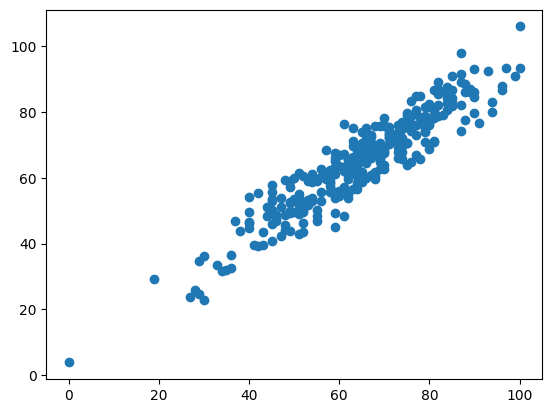

In [45]:
plt.scatter(y_test,ridge_pred)

<Axes: xlabel='math_score'>

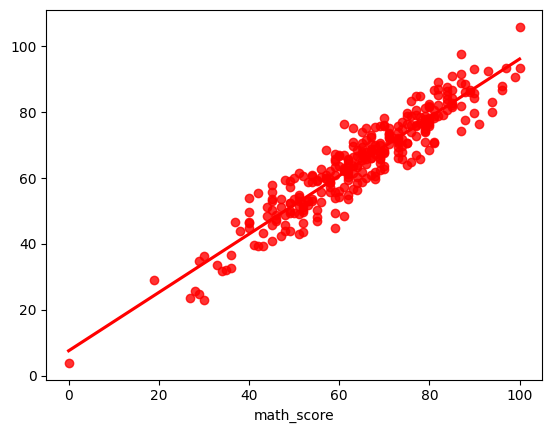

In [46]:
sns.regplot(x=y_test,y=ridge_pred,ci=None,color ='red')

In [48]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':ridge_pred,'Difference':y_test-ridge_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.522653,14.477347
737,53,58.853377,-5.853377
740,80,76.935975,3.064025
660,74,76.919776,-2.919776
411,84,87.620347,-3.620347
...,...,...,...
468,77,72.886106,4.113894
935,70,62.627388,7.372612
428,65,58.636648,6.363352
7,40,44.853500,-4.853500
